# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [16]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [17]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [18]:
def P1(num_examples):
    
#     Loop to print messages
    for i in range(0, num_examples):
        print("The message is : " + train_data[i])
        print("The label is : " + str(train_labels[i]))
        print('----------------------------------------')

P1(5)

The message is : Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
The label is : 1
----------------------------------------
The message is : 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such 

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [19]:
def P2():
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
#     Transform the training data into a matrix of word unigram feature vector
    Xlist = vectorizer.get_feature_names()
    print("Vocab size is " + str(X.shape[1]))
    print("Nonzero size is " + str(X.nnz))
    print("Nonzero size per feature " + str(round(X.nnz/X.shape[0], 4)))
    print("Nonzero in matrix is " + str(round(X.nnz/(X.shape[1] * X.shape[0]), 4)))
    print("The 0th string is " + vectorizer.get_feature_names()[0])
    print("The last string is " + vectorizer.get_feature_names()[-1])
    print("-------------------")
    
#     transform the training data into a matrix of word unigram feature vectors
    vectorizer2 = CountVectorizer(vocabulary=["atheism", "graphics", "space", "religion"])
    X2 = vectorizer2.fit_transform(train_data)
    print("Vocab size is " + str(X2.shape[1]))
    print("Nonzero size per feature " + str(round(X2.nnz/X2.shape[0], 4)))
    print("-------------------")
    
#     transform the training data into a matrix of character bigram and trigram feature vectors
    vectorizer3 = CountVectorizer(ngram_range =(2,3), analyzer='char')
    X3 = vectorizer3.fit_transform(train_data)
    print("Vocab size is " + str(X3.shape[1]))
    print("-------------------")
    
#     transform the training data into a matrix of word unigram feature vectors
    vectorizer4 = CountVectorizer(min_df=10)
    X4 = vectorizer4.fit_transform(train_data)
    print("Vocab size is " + str(X4.shape[1]))
    print("-------------------")
    
#     transform the training data into a matrix of word unigram feature vectors
    Y = vectorizer.fit_transform(dev_data)
    Ylist = vectorizer.get_feature_names()
    print("Vocab size for train is " + str(X.shape[1]))
    print("Vocab size for dev is " + str(Y.shape[1]))
    print("We are missing " + str(len(set(Ylist) - set(Xlist))) + " words")
    print("We are missing " + str(round(len(set(Ylist) - set(Xlist))/(Y.shape[1]),4) * 100) + "% of the words")




          
P2()

Vocab size is 26879
Nonzero size is 196700
Nonzero size per feature 96.706
Nonzero in matrix is 0.0036
The 0th string is 00
The last string is zyxel
-------------------
Vocab size is 4
Nonzero size per feature 0.2684
-------------------
Vocab size is 35478
-------------------
Vocab size is 3064
-------------------
Vocab size for train is 26879
Vocab size for dev is 16246
We are missing 4027 words
We are missing 24.79% of the words


### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [20]:
from sklearn.model_selection import GridSearchCV

def P3():
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
    Y = vectorizer.transform(dev_data)
    
    KNN_model = KNeighborsClassifier()
    k = list(range(100))
 
    print("KNN")
    
#     KNN function, used to fit model on various values of k, and then using Grid Search
    def KNN(k):
        KNN_model = KNeighborsClassifier(k)
        KNN_model.fit(X, train_labels)
        predict = KNN_model.predict(Y)
        score = KNN_model.score(Y, dev_labels)  
        f1 = metrics.f1_score(predict, dev_labels,average="weighted")
        print("For k = " + str(k))
        print("Accuracy = " + str(round(score, 4)))
        print("F1 = " + str(round(f1, 4)))
        print("")
    
    KNN(1)
    KNN(5)
    KNN(10)
    n_range = {'n_neighbors': range(1,30)}
    
    grid = GridSearchCV(KNN_model, scoring='f1_macro', param_grid=n_range, iid=False, cv=5)
    grid.fit(X, train_labels)
    print("Using CV grid search")
    print(grid.best_params_)
    print(grid.best_score_)
    print("----------------")
    print("Multinomial Naive Bayes")
    
    #     MNB function, used to fit model on various values of alpha, and then using Grid Search
    def MNB(alpha):
        MultinomialNB.model = MultinomialNB(alpha=alpha)
        MultinomialNB.model.fit(X, train_labels)
        predict = MultinomialNB.model.predict(Y)
        score = MultinomialNB.model.score(Y, dev_labels)
        f1 = metrics.f1_score(predict, dev_labels,average="weighted")
        print("For alpha = " + str(alpha))
        print("Accuracy = " + str(round(score, 4)))
        print("F1 = " + str(round(f1, 4)))
        print("")
    
    MNB(0.01)
    MNB(0.1)
    MNB(1)

    grid = GridSearchCV(MultinomialNB(), scoring='f1_macro', 
                        param_grid={'alpha': [0.05, 0.03, 0.02, 0.01, 0.5, 0.1]}, iid=False, cv=5)
    grid.fit(X, train_labels)
    print("Using CV grid search")
    print(grid.best_params_)
    print(grid.best_score_)
    print("----------------")
    print("Logistic Regression")
        
        #     Log Reg function, used to fit model on various values of C, and then using Grid Search
    def log_reg(C):
        logistic_regression = LogisticRegression(penalty='l2', C=C, solver = 'liblinear', multi_class='auto')
        logistic_regression.fit(X, train_labels)
        predict = logistic_regression.predict(Y)
        score = logistic_regression.score(Y, dev_labels)
        f1 = metrics.f1_score(predict, dev_labels,average="weighted")
        print(logistic_regression.coef_)
        print("For C = " + str(C))
        print("Accuracy = " + str(round(score, 4)))
        print("F1 = " + str(round(f1, 4)))
        print("")

    log_reg(0.01)
    log_reg(0.1)
    log_reg(1)

    grid = GridSearchCV(LogisticRegression(penalty='l2', solver = 'liblinear', multi_class='auto'), 
                        param_grid={'C': [0.005, 0.001, 0.05, 0.01, 0.7, 0.5, 0.3, 0.1]}, iid=False, cv=5)
    grid.fit(X, train_labels)
    print("Using CV grid search")
    print(grid.best_params_)
    print(grid.best_score_)

P3()

KNN
For k = 1
Accuracy = 0.3831
F1 = 0.3858

For k = 5
Accuracy = 0.4231
F1 = 0.4174

For k = 10
Accuracy = 0.4216
F1 = 0.4153

Using CV grid search
{'n_neighbors': 20}
0.4362471153175944
----------------
Multinomial Naive Bayes
For alpha = 0.01
Accuracy = 0.7796
F1 = 0.784

For alpha = 0.1
Accuracy = 0.7929
F1 = 0.7955

For alpha = 1
Accuracy = 0.7811
F1 = 0.7844

Using CV grid search
{'alpha': 0.02}
0.8194963350697705
----------------
Logistic Regression
[[-0.02108862  0.02496145 -0.00042816 ... -0.00042764 -0.00085528
  -0.00025214]
 [ 0.01794572 -0.01786605 -0.00508023 ... -0.00049047 -0.00098094
   0.00400537]
 [ 0.00337099  0.00349433  0.00335782 ...  0.00081788  0.00163577
  -0.00106663]
 [-0.02020411 -0.01889257 -0.00139616 ... -0.00024155 -0.0004831
  -0.00024377]]
For C = 0.01
Accuracy = 0.679
F1 = 0.6933

[[-4.91554201e-02  5.17732538e-02 -8.29050049e-05 ... -3.67669791e-04
  -7.35339582e-04 -6.95048900e-05]
 [ 7.23765821e-02 -3.11527033e-03 -7.71186668e-03 ... -8.14886767e-

**Why doesn't k-Nearest Neighbors work well for this problem?**

For KNN, there seem to be too many features. KNN works well with a small feature set because there are lots of similar values. The same cannot be said for a larger feature set.

**Why doesn't Logistic Regression work as well as Naive Bayes does?**

NB's indepdence assumption allows it to outperform Logistic Regression.

**What is the relationship between logistic regression's sum of squared weights vs. C value?**

As C goes up, there is a higher penalty, thus the sum of squared weights decreases.

ANSWER:

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [21]:
# Used Pretty Table Package
# !pip install PrettyTable
from prettytable import PrettyTable

def P4():
    vectorizer = CountVectorizer(ngram_range=(2,2))
    X = vectorizer.fit_transform(train_data)
    
#     Logistic Regression
    log_reg = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    log_reg.fit(X, train_labels)
          
#     Label names
    labels = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
    t = PrettyTable(['Text','alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc'])

      
#     Go through 4 labels, in each one, use argsort to get top 5 values. Then output them.
    for a in range(0, 4):
        print(labels[a])
#         negate list to get descending values
        for i in np.argsort(-log_reg.coef_[a, :])[:5]:
            t.add_row([vectorizer.get_feature_names()[i], 
                       round(log_reg.coef_[0, i], 3), round(log_reg.coef_[1, i], 3), round(log_reg.coef_[2, i], 3), 
                       round(log_reg.coef_[3, i], 3)])
                        
    print(t)

    
P4()

alt.atheism
comp.graphics
sci.space
talk.religion.misc
+---------------+-------------+---------------+-----------+--------------------+
|      Text     | alt.atheism | comp.graphics | sci.space | talk.religion.misc |
+---------------+-------------+---------------+-----------+--------------------+
|   claim that  |    0.606    |     -0.199    |   -0.274  |       -0.14        |
|  cheers kent  |    0.556    |     -0.698    |   -0.664  |       0.535        |
|    was just   |    0.482    |     -0.131    |   -0.129  |       -0.227       |
|    you are    |    0.473    |     -0.28     |   -0.481  |       0.028        |
|    are you    |    0.447    |     -0.248    |   -0.097  |       -0.306       |
|  looking for  |    -0.63    |     1.108     |    -0.5   |       -0.572       |
|   in advance  |    -0.459   |     0.833     |   -0.439  |       -0.418       |
| comp graphics |    -0.292   |     0.801     |   -0.371  |       -0.285       |
|   out there   |    -0.275   |     0.759     |   -0.4

ANSWER: **I see that "cheers kent" is repeated. Moreover, I see that "the fbi" is the strongest predictor of religon. Not sure why this would be the case.**

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [22]:
def better_preprocessor(s):
#     Finding ways to change vocab
    toReturn = s.lower()
    pattern = '[^a-zA-Z_0-9]'
    toReturn = re.sub(pattern," ", toReturn)
    pattern2 = r'\b\w{2,4}\b'
    toReturn = re.sub(pattern2,'', toReturn)  
    return toReturn
    

def better_model():
    print("Improved Logistic Regression")
    vectorizer = CountVectorizer(preprocessor=better_preprocessor)
    X = vectorizer.fit_transform(train_data)
    Y = vectorizer.transform(dev_data)

    
#     Logistic Regression
    logistic_regression = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    logistic_regression.fit(X, train_labels)
    predict = logistic_regression.predict(Y)
    score = logistic_regression.score(Y, dev_labels)
    f1 = metrics.f1_score(predict, dev_labels,average="weighted")
    print("Accuracy = " + str(round(score, 4)))
    print("F1 = " + str(round(f1, 4)))
    print("Shape is " + str(X.shape[1]))
    print("")
    return f1, X.shape[1]


def P5():
    print("Base Logistic Regression")
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
    Y = vectorizer.transform(dev_data)

    
#     Logistic Regression
    logistic_regression = LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")
    logistic_regression.fit(X, train_labels)
    predict = logistic_regression.predict(Y)
    score = logistic_regression.score(Y, dev_labels)
    f1 = metrics.f1_score(predict, dev_labels,average="weighted")
    print("Accuracy = " + str(round(score, 4)))
    print("F1 = " + str(round(f1, 4)))
    print("Shape is " + str(X.shape[1]))
    print("")
#     return f1

    log1, log2 = better_model()
    
    print("Difference in F1 is " + str(round(log1 - f1, 4)))
    print("Difference in Shape is " + str(X.shape[1] - log2))

P5()

Base Logistic Regression
Accuracy = 0.7145
F1 = 0.7205
Shape is 26879

Improved Logistic Regression
Accuracy = 0.7278
F1 = 0.7365
Shape is 21107

Difference in F1 is 0.0159
Difference in Shape is 5772


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

FI for 0.001 is: 0.4269
FI for 0.005 is: 0.4621
FI for 0.01 is: 0.494
FI for 0.03 is: 0.617
FI for 0.05 is: 0.6528
FI for 0.07 is: 0.6513
FI for 0.1 is: 0.7095
FI for 0.3 is: 0.6902
FI for 0.5 is: 0.6714
FI for 0.7 is: 0.6869
FI for 1 is: 0.682
FI for 2 is: 0.7046


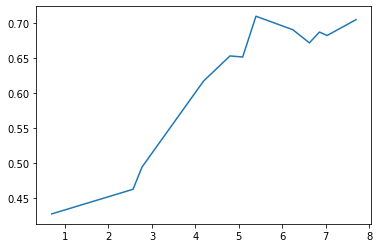

In [23]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


def P6():
#     Keep this random seed here to make comparison easier.
    np.random.seed(0)
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(train_data)
    Y = vectorizer.transform(dev_data)
    C = [0.001, 0.005, 0.01, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7, 1, 2]


    vocab_size = []
    f1_score = []
    
#     Loop through C values
    for i in C:
        logistic_regression = LogisticRegression(C=i, multi_class="auto", penalty="l1", tol=.015)
        logistic_regression.fit(X, train_labels)
        predict = logistic_regression.predict(Y)
        
#         Find where coefficients are not 0
        new_matrix = np.argwhere(logistic_regression.coef_!=0)
        
#         Get new vocab 
        new_words = []
        feature_names = vectorizer.get_feature_names()
        for x in new_matrix:
            new_words.append(feature_names[x[1]])
            
#         Make sure the words are not repeated
        new_words = np.unique(new_words)
        vocab_size.append(new_words.shape[0])
            
        
        
#         Using L2
        vectorizer2 = CountVectorizer(vocabulary = new_words)
        X2 = vectorizer2.fit_transform(train_data)
        Y2 = vectorizer2.transform(dev_data)
        
        logistic_regression2 = LogisticRegression(C=0.5, multi_class="auto", penalty="l2", tol=.015)
        logistic_regression2.fit(X2, train_labels)

        predict2 = logistic_regression2.predict(Y2)
        f12 = metrics.f1_score(predict2, dev_labels, average="weighted")
        f1_score.append(f12)
        print("FI for " + str(i) + " is: " + str(round(f12, 4)))
        
        

    sns.lineplot(np.log(vocab_size), f1_score)



P6()

ANSWER: **The graph generally shows the trend, following the higher the vocab size, the higher the F1 score.**

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [24]:
def P7():

#   Vectorize
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(train_data)
    Y = vectorizer.transform(dev_data)
        
#   Implement logistic regression 
    logistic_regression = LogisticRegression(C=100, solver="liblinear", multi_class="auto", penalty = 'l2')
    logistic_regression.fit(X, train_labels)
    predict = logistic_regression.predict(Y)
    f1 = metrics.f1_score(predict, dev_labels, average="weighted")
    print("F1 = " + str(round(f1, 3)))
    print("--------------------------------------------------------")

#   Get max predicted probability
    probability = logistic_regression.predict_proba(Y)
    maxp = probability.max(axis = 1)

    
#   Empty array for predicted proababilites
    predictprob  = []
    
#   Loop to get proababilites
    for i in range(0, probability.shape[0]):
        predicted_prob = probability[i, dev_labels[i]]
        predictprob.append(predicted_prob)
     
    
    Rratio = maxp/predictprob
    
#   negate array for descendig Rratio
    sortted_Rratio = np.argsort(-Rratio)
    
#   Get a list of the labels
    labels = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

#   Loop through highest 3 R ratios
    print("3 Highest R Ratio")
    print("")
    for i in range(0, 3):
        print(dev_data[sortted_Rratio[i]])
        print('*****')
        print("Actual class: " + str(labels[dev_labels[sortted_Rratio[i]]]))
        print("Predicted class: " + str(labels[predict[sortted_Rratio[i]]]))
        print("R Ratio: " + str(round(Rratio[sortted_Rratio[i]], 3)))
        print("--------------------------------------------------------")


P7()

F1 = 0.767
--------------------------------------------------------
3 Highest R Ratio

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use of th

ANSWER: **TFIDF is different in that it uses the Count Vectorizer, and then is transformed by the TfidfTransformer. The transformer gives a higher weight to words that show up less often, and vice versa. The idea is that the less frequently a word shows up, the more information that it gives. THe variables used at the total documents, and the document frequency. The formula is: idf(t) = log [ n / df(t) ] + 1.**

**The R ratio is an inverse indicator of how confident the model is in the prediction. The lowest score of 1 means that maximum predicted probability = predicted probability of correct label. This means both numbers are the same. The highest ratio is 900+, where the the prediction was completely off. The level of confidence on the prediction was extremely low.**